## Import packages and define global variables and functions

In [175]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ast import literal_eval

CM_PX_RATIO = 9e-3

def parse_liststr(x):
    """
    Parse list string stored in .csv file by pandas to float list

    :x:             "[ __._____ __._____ ]"
    :return:        [__._____, __._____]
    """
    x = x[1:-1]     # remove [ ]
    x = str.split(x)
    return literal_eval('['+x[0]+','+x[1]+']')

filename = 'result.csv'
bubble_table = pd.read_csv(filename, converters={'column_name': literal_eval})

## Read file and obtain the data wanted

In [205]:
filename = 'result.csv'
bubble_table_raw = pd.read_csv(filename)
bubble_table = bubble_table_raw.copy()

# convert float list in string format to float list
bubble_movement_mm = np.array(list(map(parse_liststr, bubble_table_raw['movement']))) \
                     * 10 * CM_PX_RATIO

bubble_table.radius = bubble_table_raw.radius * 10       # convert cm to mm
bubble_table['move_x'] = bubble_movement_mm[:, 0]        # +:right  -:left
bubble_table['move_y'] = -1 * bubble_movement_mm[:, 1]   # +:top    -:down

C:\Users\MK9\AppData\Local\Temp/ipykernel_38112/2869307533.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels)


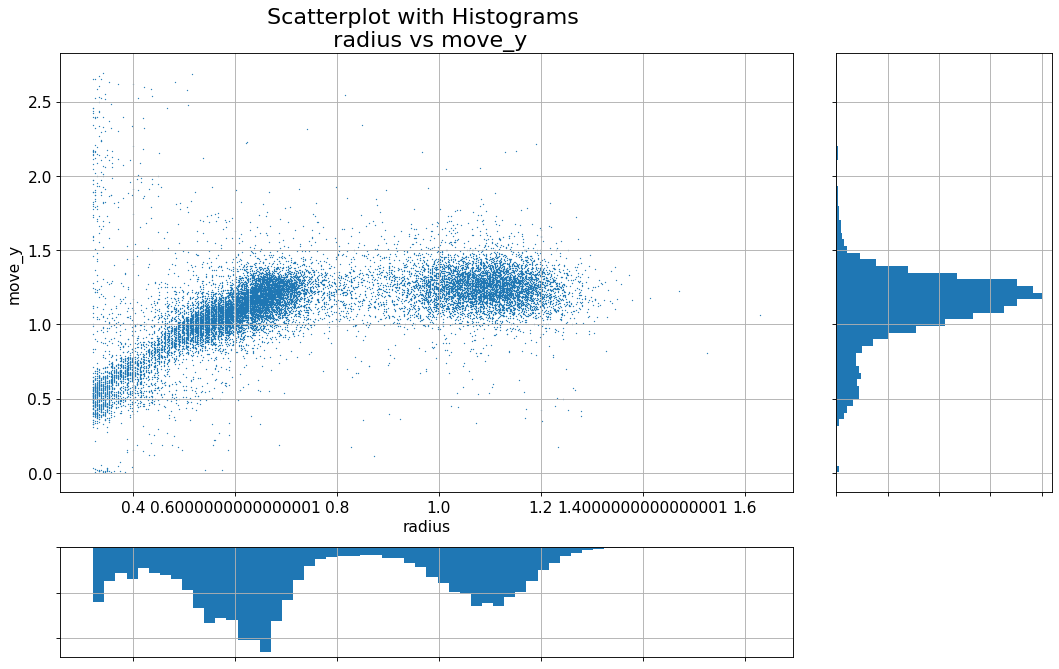

In [210]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('radius', 'move_y', s=0.5, alpha=.9, data=bubble_table, linewidths=.5)
ax_main.grid()

# histogram on the right
ax_bottom.hist(bubble_table.radius, 60, histtype='stepfilled', orientation='vertical')
ax_bottom.invert_yaxis()
ax_bottom.grid()

# histogram in the bottom
ax_right.hist(bubble_table.move_y, 60, histtype='stepfilled', orientation='horizontal')
ax_right.grid()

# Decorations
ax_main.set(title='Scatterplot with Histograms \n radius vs move_y', xlabel='radius', ylabel='move_y')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

C:\Users\MK9\AppData\Local\Temp/ipykernel_38112/79519816.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels)


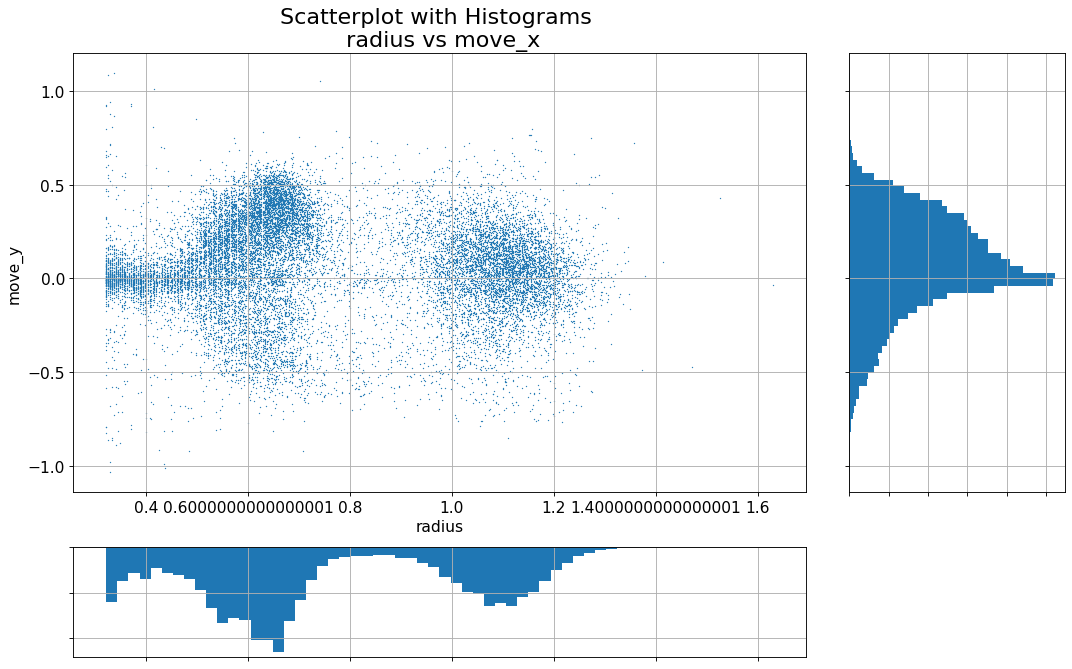

In [211]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('radius', 'move_x', s=0.5, alpha=.9, data=bubble_table, linewidths=.5)
ax_main.grid()

# histogram on the right
ax_bottom.hist(bubble_table.radius, 60, histtype='stepfilled', orientation='vertical')
ax_bottom.invert_yaxis()
ax_bottom.grid()

# histogram in the bottom
ax_right.hist(bubble_table.move_x, 60, histtype='stepfilled', orientation='horizontal')
ax_right.grid()

# Decorations
ax_main.set(title='Scatterplot with Histograms \n radius vs move_x', xlabel='radius', ylabel='move_y')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

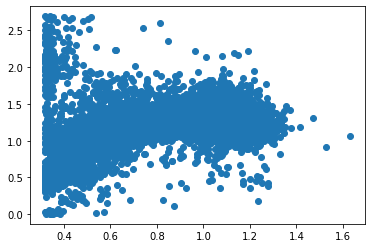

In [139]:
plt.scatter(radius_distribution_mm, bubble_move_distance)

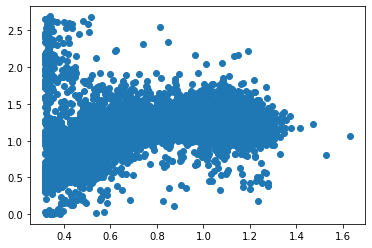

In [143]:
bubble_move_y_mm = abs(bubble_movement_mm[:, 1])
plt.scatter(radius_distribution_mm, bubble_move_y_mm)

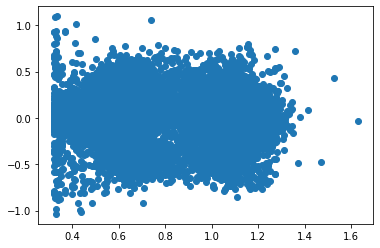

In [144]:
bubble_move_x_mm = bubble_movement_mm[:, 0]
plt.scatter(radius_distribution_mm, bubble_move_x_mm)

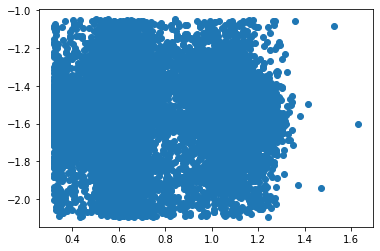

In [145]:
bubble_move_direction = np.arctan2(bubble_movement_mm[:, 1], bubble_movement_mm[:, 0])
plt.scatter(radius_distribution_mm, bubble_move_direction)

(array([  30.,    4.,   15.,   10.,   17.,   89.,  188.,  301.,  330.,
         344.,  322.,  282.,  422.,  699., 1290., 1881., 2495., 2899.,
        2842., 2011.,  930.,  393.,  148.,   96.,   71.,   50.,   33.,
          26.,   26.,   14.,   13.,   15.,   16.,    6.,   12.,    8.,
           9.,    9.,    7.,    8.]),
 array([0.00397556, 0.07116939, 0.13836323, 0.20555706, 0.27275089,
        0.33994472, 0.40713855, 0.47433238, 0.54152621, 0.60872004,
        0.67591388, 0.74310771, 0.81030154, 0.87749537, 0.9446892 ,
        1.01188303, 1.07907686, 1.14627069, 1.21346453, 1.28065836,
        1.34785219, 1.41504602, 1.48223985, 1.54943368, 1.61662751,
        1.68382134, 1.75101518, 1.81820901, 1.88540284, 1.95259667,
        2.0197905 , 2.08698433, 2.15417816, 2.22137199, 2.28856583,
        2.35575966, 2.42295349, 2.49014732, 2.55734115, 2.62453498,
        2.69172881]),
 [<matplotlib.patches.Polygon at 0xf4aad18>])

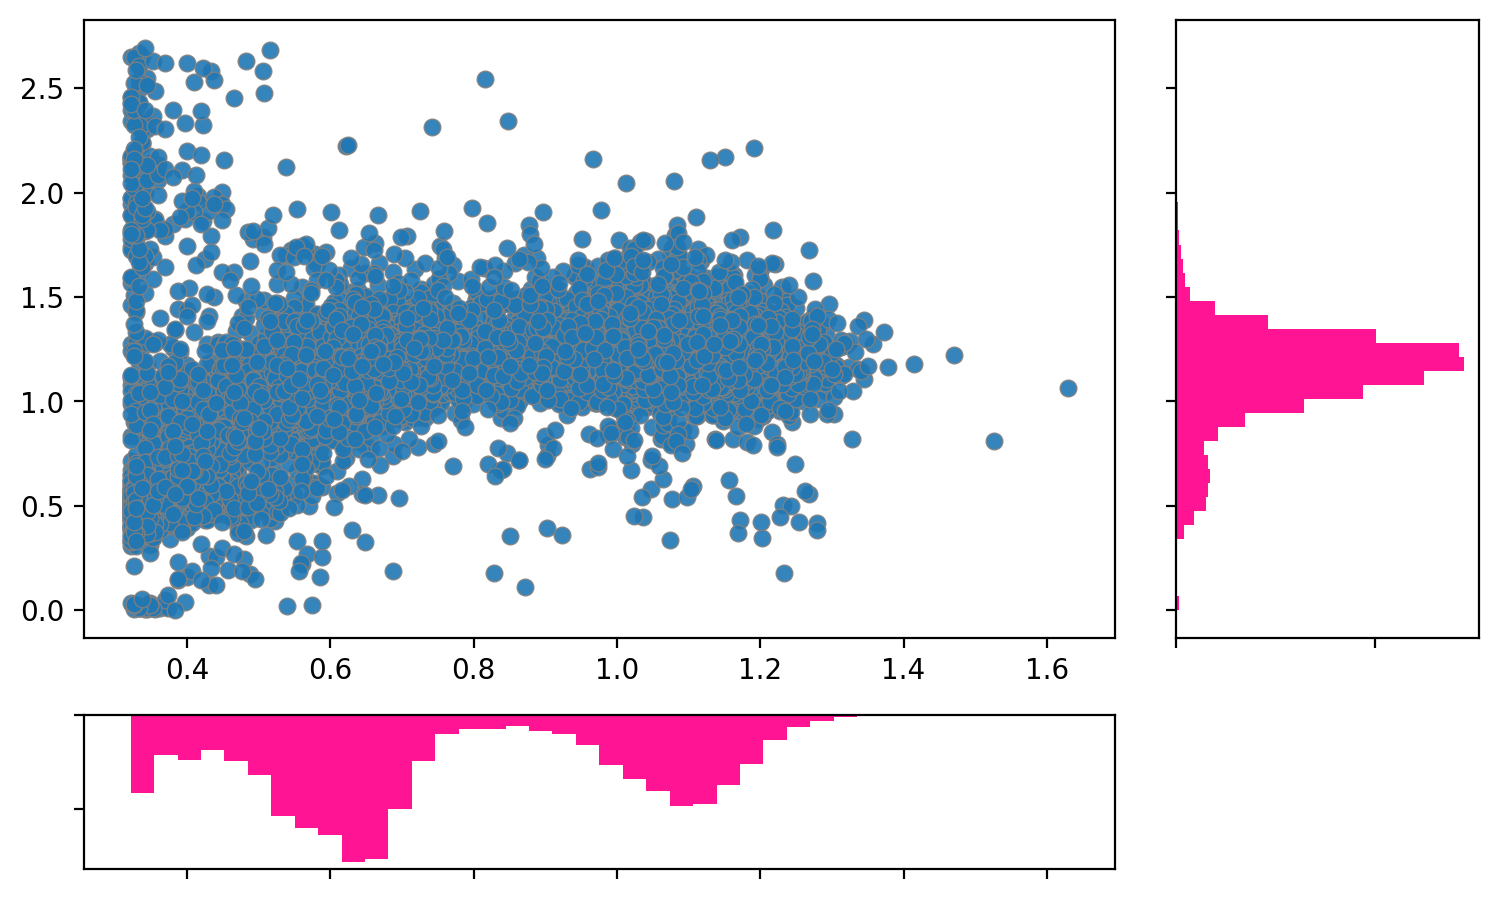

In [146]:
# Plot marginal histogram

# Create Fig and gridspec
fig = plt.figure(figsize=(9, 9*10/16), dpi= 200)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter(radius_distribution_mm, bubble_move_y_mm, alpha=.9, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(radius_distribution_mm, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(bubble_move_y_mm, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')